In [34]:
import re
import urllib
import urllib2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os.path
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (2, 4)

EX. 1

In [2]:
txt_file = """Rose    416-333-4444    rose@someplace.com
Martha  905-888-1234    martha@hotmail.com
Donna   647-222-9876    donna@rogers.ca
Amy 905-777-2222    amy@gmail.com"""

In [3]:
l = txt_file.split("\n")
print l

['Rose    416-333-4444    rose@someplace.com', 'Martha  905-888-1234    martha@hotmail.com', 'Donna   647-222-9876    donna@rogers.ca', 'Amy 905-777-2222    amy@gmail.com']


In [4]:
for s in l:
    a = re.search("[A-Z]\S*", s).group()
    b = re.search("\d{3}-\d{3}-\d{4}", s).group()
    print a, b

Rose 416-333-4444
Martha 905-888-1234
Donna 647-222-9876
Amy 905-777-2222


EX. 2

In [5]:
y = re.compile("^[a-z]{5,8}$")

In [6]:
print bool(y.match("antynatalizm"))
print bool(y.match("janpawel"))
print bool(y.match("drugi"))
print bool(y.match("Dzieci"))
print bool(y.match("OOO0OO"))
print bool(y.match("sdfdsdsd"))
print bool(y.match("anti5zm"))

False
True
True
False
False
True
False


In [7]:
x = re.compile("^[A-Z][a-z]*$")

In [8]:
print bool(x.match("Alfabet"))
print bool(x.match("AlfaBetaGamma"))
print bool(x.match("B"))
print bool(x.match(""))
print bool(x.match("b"))
print bool(x.match("A8"))

True
False
True
False
False
False


EX.3

In [26]:
url = "https://en.wikipedia.org/wiki/Administrative_divisions_of_Mexico"
response = urllib2.urlopen(url)
html = response.read()

In [27]:
ll = re.findall("Abbrevations\sfor\sthe\sstates\sof\sMexico[\s\S]*MX\s-\sZA</td>", html)[0]

In [28]:
l = re.findall("<td\sstyle\=\"text-align\:left\;\">[^\n]*</td>", ll)

In [29]:
state_names = [re.findall("title[^<]*<", a)[0] for a in l]
state_names = [re.sub("^[\s\S]*>", "", re.sub("<", "", s)) for s in state_names]

In [30]:
flags = [re.findall("src=\"[\S]*png", a)[0] for a in l]
flags = [re.sub("src=\"//", "", s) for s in flags]

In [31]:
flags_local = [re.sub("/", "", re.search("/[^/]*$", image_url).group()) for image_url in flags]

In [32]:
codes = re.findall("<td>[A-Z]{2}\s-\s[A-Z]{2}</td>", ll)
codes = [re.sub("<[\S]{1,2}d>", "", s) for s in codes]

In [33]:
print len(flags), len(state_names), len(codes), len(flags_local)

32 32 32 32


In [35]:
for imurl, imlcph in zip(flags, flags_local):
    if not os.path.exists(imlcph):
        urllib.urlretrieve("https://" + imurl, imlcph)

Aguascalientes


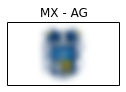

Baja California


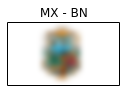

Baja California Sur


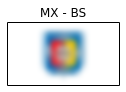

Campeche


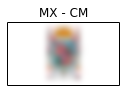

Chiapas


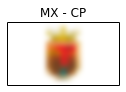

Chihuahua


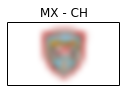

Coahuila


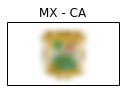

Colima


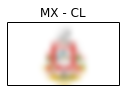

Federal District


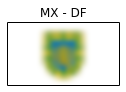

Durango


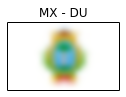

Guanajuato


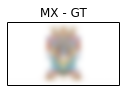

Guerrero


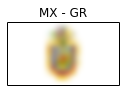

Hidalgo


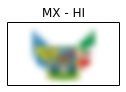

Jalisco


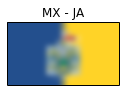

México


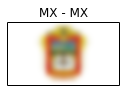

Michoacán


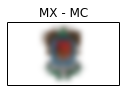

Morelos


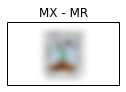

Nayarit


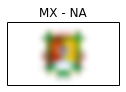

Nuevo León


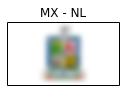

Oaxaca


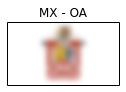

Puebla


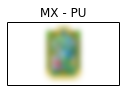

Querétaro


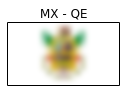

Quintana Roo


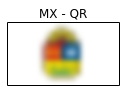

San Luis Potosí


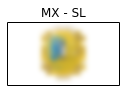

Sinaloa


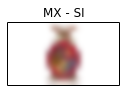

Sonora


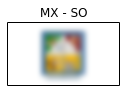

Tabasco


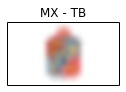

Tamaulipas


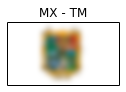

Tlaxcala


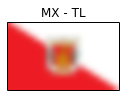

Veracruz


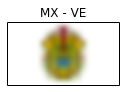

Yucatán


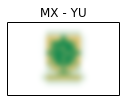

Zacatecas


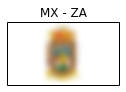

In [36]:
for name, code, imlcph in zip(state_names, codes, flags_local):
    img = mpimg.imread(imlcph)
    plt.imshow(img,interpolation="bicubic")
    print name
    plt.title(code)
    plt.xticks([])
    plt.yticks([])
    plt.show()